# Paquetes

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import numpy as np, pandas as pd
from uncertainties import ufloat
from uncertainties.umath import exp

# Problema 1

In [2]:
def ruth_cross_sections(Z_1, Z_2, E_cm, theta):
    e = 1.602e-19 #Coulombs
    sigma = (((Z_1 *Z_2 *e**2)/(4*E_cm))**2) *(1/np.sin(theta/2))
    return sigma

def ruth_N(Z_1, Z_2, E_cm, theta, F, n, A, Delta_x):
    e = 1.602e-19 #Coulombs 
    sigma = ruth_cross_sections(Z_1, Z_2, E_cm, e, theta)
    N = F*n*A*Delta_x*sigma 
    return N 
def razon(Z1 , Z2, rho1, rho2, A1, A2):
    alpha = 0.55
    return alpha*(rho1*A2*(Z1**2))/(rho2*A1*(Z2**2))
def rect(a, b, x):
    return a*x +b 

In [3]:
# Definición de constantes físicas

# Cargas atómicas
Z_alpha = 2
Z_silver = 47
Z_gold = 79

# Densidades (g/cm³)
rho_silver = 10.49
rho_gold = 19.32

# Pesos atómicos (g/mol)
A_silver = 107.8682
A_gold = 196.966569

# Flujo
import numpy as np
Flujo = 100 / (np.pi**2)  # milicurios/(mL²)

# Mostrar las constantes
Z_alpha, Z_silver, Z_gold, rho_silver, rho_gold, A_silver, A_gold, Flujo


(2, 47, 79, 10.49, 19.32, 107.8682, 196.966569, 10.132118364233778)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_12998/3231669126.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('gold&silver.txt', sep='\s+')


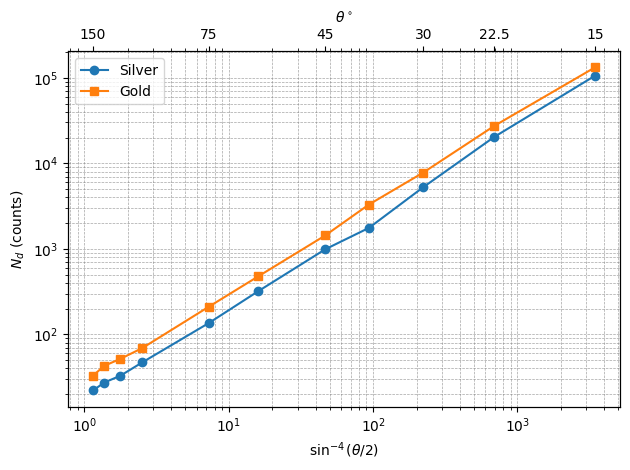

In [4]:
# Read the data
df = pd.read_csv('gold&silver.txt', sep='\s+')
# Verificamos las primeras filas
df.head()
# Compute x-axis: sin^-4(theta/2)
df['x'] = np.sin(np.deg2rad(df['Angle'] / 2))**(-4)

# Plot
fig, ax = plt.subplots()
ax.loglog(df['x'], df['N_silver'], marker='o', label='Silver')
ax.loglog(df['x'], df['N_gold'], marker='s', label='Gold')
# Activa la grilla en ejes x e y, para ambas escalas (mayor y menor)
ax.grid(True,
        which='both',
        linestyle='--',
        linewidth=0.5,
        color='gray',
        alpha=0.7)

ax.set_xlabel(r'$\sin^{-4}(\theta/2)$')
ax.set_ylabel(r'$N_d$ (counts)')
ax.legend()

# Top axis for angle ticks
ax2 = ax.twiny()
angle_ticks = [150, 75, 45, 30, 22.5, 15]
x_ticks = np.sin(np.deg2rad(np.array(angle_ticks) / 2))**(-4)
ax2.set_xscale('log')
ax2.set_xticks(x_ticks)
ax2.set_xbound(ax.get_xbound())
ax2.set_xlabel(r'$\theta^\circ$')
ax2.set_xticklabels(angle_ticks)
plt.tight_layout()
plt.savefig("grafica_au_ag.pdf.pdf", bbox_inches='tight', pad_inches=0.025)
plt.show()

In [5]:



# Cargar datos
df = pd.read_csv('gold&silver.txt', sep=r'\s+')

# Calcular x = sin^{-4}(theta/2)
x = np.sin(np.deg2rad(df['Angle'] / 2))**(-4)

# Tomar logaritmos
log_x = np.log(x)
log_N_silver = np.log(df['N_silver'])
log_N_gold = np.log(df['N_gold'])

# Definir modelo lineal
def linear_model(x, slope, intercept):
    return slope * x + intercept

model = Model(linear_model)

# Ajuste para silver
silver_result = model.fit(log_N_silver, x=log_x, slope=1, intercept=0)

# Ajuste para gold
gold_result = model.fit(log_N_gold, x=log_x, slope=1, intercept=0)

# Mostrar resultados
print("Ajuste Silver:")
print(silver_result.fit_report())
print("\nAjuste Gold:")
print(gold_result.fit_report())


Ajuste Silver:
[[Model]]
    Model(linear_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 11
    # variables        = 2
    chi-square         = 0.08808320
    reduced chi-square = 0.00978702
    Akaike info crit   = -49.1010557
    Bayesian info crit = -48.3052652
    R-squared          = 0.99893736
[[Variables]]
    slope:      1.05733084 +/- 0.01149515 (1.09%) (init = 1)
    intercept:  2.87854861 +/- 0.04734628 (1.64%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.7766

Ajuste Gold:
[[Model]]
    Model(linear_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 11
    # variables        = 2
    chi-square         = 0.03071032
    reduced chi-square = 0.00341226
    Akaike info crit   = -60.6915702
    Bayesian info crit = -59.8957797
    R-squared          = 0.99961731
[[Variables]]
    slope:      1.04070029 +/- 0

In [6]:

# Carga y preparación
df = pd.read_csv('gold&silver.txt', sep=r'\s+')
x = np.log(np.sin(np.deg2rad(df['Angle']/2))**-4)

# Ajustes con covarianza
ps, cs = np.polyfit(x, np.log(df['N_silver']), 1, cov=True)
pg, cg = np.polyfit(x, np.log(df['N_gold']),   1, cov=True)

# Interceptos con incertidumbre
b_s = ufloat(ps[1], np.sqrt(cs[1,1]))
b_g = ufloat(pg[1], np.sqrt(cg[1,1]))

# Ratio con propagación
ratio = exp(b_g) / exp(b_s)

print(b_s)
print(b_g)
print(ratio)

r = razon(Z_gold , Z_silver, rho_gold, rho_silver, A_gold, A_silver)
print(r)

2.88+/-0.05
3.336+/-0.028
1.58+/-0.09
1.5673056597225323


# Problema 3

In [7]:


# Cell 1: Cargar datos y convertir rango a cm
def load_csda(filename):
    energies = []
    csda_gcm2 = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip()
            if re.match(r'^[\d\.]', line):
                parts = line.split()
                if len(parts) >= 2:
                    energies.append(float(parts[0]))
                    csda_gcm2.append(float(parts[1]))
    return pd.DataFrame({'E_MeV': energies, 'CSDA_gcm2': csda_gcm2})

# Densidades y nombres en español
densities = {
    'Air': 0.001205,
    'Aluminum': 2.70,
    'silver': 10.49,
    'gold': 19.32
}
material_names = {
    'Air': 'aire',
    'Aluminum': 'aluminio',
    'silver': 'plata',
    'gold': 'oro'
}

data = {}
for mat, rho in densities.items():
    df = load_csda(f'{mat}.txt')
    df['Range_cm'] = df['CSDA_gcm2'] / rho
    data[mat] = df




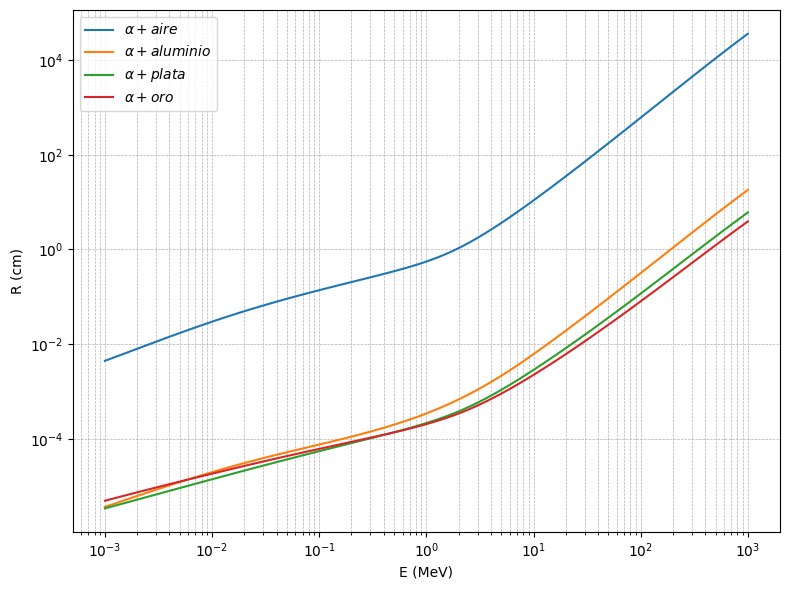

In [8]:
# Cell 2: Gráfica combinada
plt.figure(figsize=(8,6))
for mat, df in data.items():
    name = material_names[mat]
    plt.loglog(df['E_MeV'], df['Range_cm'], markevery=10,
               label=rf'$\alpha + {name}$')
plt.xlabel('E (MeV)')
plt.ylabel('R (cm)')
#plt.title('Rango CSDA vs Energía para partículas α')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("Rango CSDA vs Energía para partículas α.pdf", bbox_inches='tight', pad_inches=0.025)
plt.show()

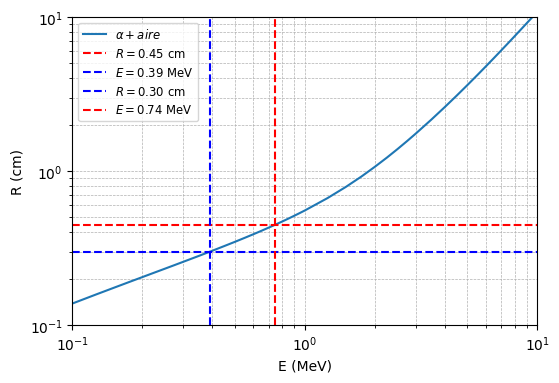

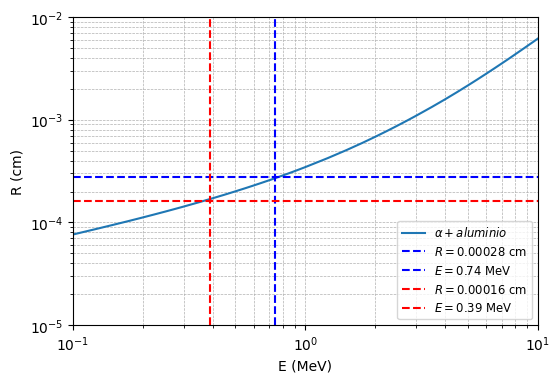

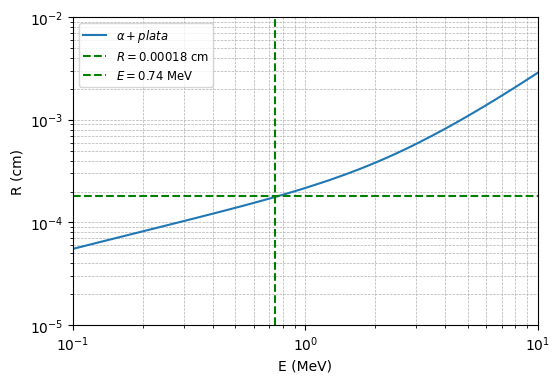

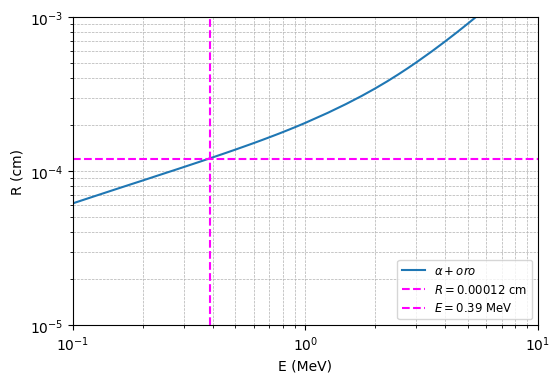

In [9]:
for mat, df in data.items():
    name = material_names[mat]
    plt.figure(figsize=(6,4))
    # trazamos la curva continua y la etiquetamos para la leyenda
    plt.loglog(df['E_MeV'], df['Range_cm'], label=rf'$\alpha + {name}$', markevery=10)

    # definimos color potente según el material
    if mat.lower() == 'air':
        c = 'red'
        d = 'blue'
        # líneas que se intersectan
        plt.axhline(0.45, linestyle='--', color=c, label=r'$R = 0.45\ \mathrm{cm}$')
        plt.axvline(0.39, linestyle='--', color=d, label=r'$E = 0.39\ \mathrm{MeV}$')
        plt.axhline(0.30, linestyle='--', color=d, label=r'$R = 0.30\ \mathrm{cm}$')
        plt.axvline(0.74, linestyle='--', color=c, label=r'$E = 0.74\ \mathrm{MeV}$')
        plt.xlim(1e-1, 1e1)
        plt.ylim(1e-1, 1e1)

    elif mat.lower() == 'gold':
        c = 'magenta'
        plt.axhline(0.00012, linestyle='--', color=c, label=r'$R = 0.00012\ \mathrm{cm}$')
        plt.axvline(0.39, linestyle='--', color=c, label=r'$E = 0.39\ \mathrm{MeV}$')
        plt.xlim(1e-1, 1e1)
        plt.ylim(1e-5, 1e-3)

    elif mat.lower() == 'silver':
        c = 'green'
        plt.axhline(0.00018, linestyle='--', color=c, label=r'$R = 0.00018\ \mathrm{cm}$')
        plt.axvline(0.74, linestyle='--', color=c, label=r'$E = 0.74\ \mathrm{MeV}$')
        plt.xlim(1e-1, 1e1)
        plt.ylim(1e-5, 1e-2)

    elif mat.lower() == 'aluminum':
        c = 'blue'
        d = 'red'
        plt.axhline(0.00028, linestyle='--', color=c, label=r'$R = 0.00028\ \mathrm{cm}$')
        plt.axvline(0.74, linestyle='--', color=c, label=r'$E = 0.74\ \mathrm{MeV}$')
        plt.axhline(0.00016, linestyle='--', color=d, label=r'$R = 0.00016\ \mathrm{cm}$')
        plt.axvline(0.39, linestyle='--', color=d, label=r'$E = 0.39\ \mathrm{MeV}$')
        plt.xlim(1e-1, 1e1)
        plt.ylim(1e-5, 1e-2)

    # configuraciones finales
    plt.xlabel('E (MeV)')
    plt.ylabel('R (cm)')
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.legend(loc='best', fontsize='small')

    # guardado de la figura
    filename = f"rango_CSDA_alpha_{name}.pdf"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.025)
    plt.show()


# Problema 7

In [11]:
x=6241509647120.4 
E_mev= E*x
print (f"{E_mev:e}") 

9.873313e+01


In [10]:
import numpy as np
c = 3e8
p= 1.05457182e-34/(2e-15)
v = p/9.1e-31
E = np.sqrt((p**2)*(c**2)+ (c**4)*(9.1e-31)**2)
print (f"{p:e}") 
print (f"{v:e}") 
print (f"{E:e}")  

5.272859e-20
5.794351e+10
1.581879e-11


In [12]:
E_N = 3*5.7/(14*x)
E_p = 5.7 /x

v_N = np.sqrt(2 *E_N / 2.3258671e-26)
v_p = np.sqrt(2*E_p/1.67262e-27)


print (f"{v_N:e}") 
print (f"{v_p:e}") 

4.102152e+06
3.304524e+07


In [13]:
v01 = ((14 +1)/2)*v_N
v02 = v_p

print (f"{v01:e}") 
print (f"{v02:e}") 

3.076614e+07
3.304524e+07


# Problema 9

In [15]:
import math

# Constantes
hbar_c = 197.3  # MeV·fm
mn_c2 = 939.6   # MeV
r0 = 1.2        # fm

# -----------------------
# (1) Energía óptima para Zr
# -----------------------

A_zr = 90
R_zr = r0 * A_zr**(1/3)
print(f"Radio del Zr: R = {R_zr:.2f} fm")

# E_opt = hbar² / (2 m_n R²)
E_opt_zr = (hbar_c**2) / (2 * mn_c2 * R_zr**2)
print(f"Energía cinética óptima (Zr): E_opt ≈ {E_opt_zr:.2f} MeV")

# -----------------------
# (2) Número de ondas parciales para Pb + n(14.5 MeV)
# -----------------------

A_pb = 208
E_n = 14.5  # MeV

# Radio del plomo
R_pb = r0 * A_pb**(1/3)
print(f"Radio del Pb-208: R = {R_pb:.2f} fm")

# Número de onda libre: k = sqrt(2mE) / ħ
k = math.sqrt(2 * mn_c2 * E_n) / hbar_c
print(f"Número de onda k = {k:.2f} 1/fm")

# Número máximo de onda parcial ℓ_max ≈ k * R
l_max = round(k * R_pb)
print(f"Orden máximo de onda parcial ℓ_max = {l_max}")


Radio del Zr: R = 5.38 fm
Energía cinética óptima (Zr): E_opt ≈ 0.72 MeV
Radio del Pb-208: R = 7.11 fm
Número de onda k = 0.84 1/fm
Orden máximo de onda parcial ℓ_max = 6


# Problema 11

In [14]:
# Constantes
u_to_MeV = 931.494  # MeV/u
MeV_to_J = 1.6022e-13  # J/MeV
P = 100  # Potencia en watts (J/s)

# Masas atómicas en u
m_p = 1.007276
m_n = 1.008665
m_d = 2.013553
m_t = 3.015501
m_He3 = 3.014932
m_He4 = 4.001506

# Reacción (a): d + d → p + ³H
delta_m_a = 2 * m_d - (m_p + m_t)
E_a = delta_m_a * u_to_MeV
N_a = P / (E_a * MeV_to_J)

# Reacción (b): d + d → n + ³He
delta_m_b = 2 * m_d - (m_n + m_He3)
E_b = delta_m_b * u_to_MeV
N_b = P / (E_b * MeV_to_J)

# Reacción (c): ³H + d → n + ⁴He
delta_m_c = (m_t + m_d) - (m_n + m_He4)
E_c = delta_m_c * u_to_MeV
N_c = P / (E_c * MeV_to_J)

# Resultados
print(f"(a) Eₐ = {E_a:.2f} MeV\tNₐ = {N_a:.2e} reacciones/s")
print(f"(b) Eᵦ = {E_b:.2f} MeV\tNᵦ = {N_b:.2e} reacciones/s")
print(f"(c) E_c = {E_c:.2f} MeV\tN_c = {N_c:.2e} reacciones/s")


(a) Eₐ = 4.03 MeV	Nₐ = 1.55e+14 reacciones/s
(b) Eᵦ = 3.27 MeV	Nᵦ = 1.91e+14 reacciones/s
(c) E_c = 17.59 MeV	N_c = 3.55e+13 reacciones/s
